In [125]:
import pandas as pd

file_path = 'datos_apartamentos_rent.csv'

df = pd.read_csv(file_path, encoding='cp1252', sep=';')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


## Eliminar datos duplicados

In [126]:
df_cleaned = df.copy() 
df_regresion = df.copy()
df_cleaned = df.drop_duplicates()
df_cleaned.duplicated().sum()

print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")

Number of rows before cleaning: 10000
Number of rows after cleaning: 10000


## Eliminar datos vacíos

In [127]:
df_cleaned = df_cleaned.dropna()
print(f"Number of rows after removing empty data: {len(df_cleaned)}")

Number of rows after removing empty data: 2570


## Categorizacion de texto a numerico: 

In [128]:
import numpy as np

df_regresion['pets_allowed'] = df_regresion['pets_allowed'].replace(
    {None: 0, np.nan: 0, 'Cats': 1, 'Dogs': 1, 'Cats,Dogs': 1}
).astype(int)
df_regresion.head(50)['pets_allowed'] 

C:\Users\marti\AppData\Local\Temp\ipykernel_19152\3099819869.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_regresion['pets_allowed'] = df_regresion['pets_allowed'].replace(


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    1
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
40    1
41    1
42    0
43    0
44    1
45    1
46    1
47    0
48    1
49    1
Name: pets_allowed, dtype: int32

In [129]:
df_regresion['has_photo'] = df_regresion['has_photo'].replace(
    {'Thumbnail': 1, 'Yes': 1, 'No': 0}
).astype(int)
df_regresion.head(50)['pets_allowed'] 

C:\Users\marti\AppData\Local\Temp\ipykernel_19152\2212266322.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_regresion['has_photo'] = df_regresion['has_photo'].replace(


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    1
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
40    1
41    1
42    0
43    0
44    1
45    1
46    1
47    0
48    1
49    1
Name: pets_allowed, dtype: int32

## Columnas Necesarias Para La Regresión

In [130]:
indices = df.columns.values.tolist()
indices_text = df.columns.values.tolist()
#print(indices)
columnas = ['bathrooms', 'bedrooms' ,'has_photo', 'pets_allowed', 'square_feet', 'state', 'source','price']
Columnas_eliminar = list(set(indices) - set(columnas))
print(Columnas_eliminar)


columnas_text = ['title','body','price']
Columnas_eliminar_text = list(set(indices_text) - set(columnas_text))
print(Columnas_eliminar_text)

['title', 'cityname', 'longitude', 'category', 'id', 'fee', 'latitude', 'address', 'time', 'body', 'amenities', 'price_type', 'price_display', 'currency']
['longitude', 'id', 'pets_allowed', 'address', 'source', 'price_type', 'price_display', 'currency', 'cityname', 'category', 'fee', 'latitude', 'has_photo', 'bedrooms', 'time', 'bathrooms', 'amenities', 'state', 'square_feet']


In [131]:
df_text = df_regresion.copy()
df_text = df_text.drop(columns=Columnas_eliminar_text)
df_text.head()



,title,body,price
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",790
1,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",425
2,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1390
3,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",925
4,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",880


In [132]:
df_regresion = df_regresion.drop(columns=Columnas_eliminar)
df_regresion.head()


,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,state,source
0,NaN,0.0,1,0,790,101,DC,RentLingo
1,NaN,1.0,1,0,425,106,IN,RentLingo
2,1.0,0.0,1,0,1390,107,VA,RentLingo
3,1.0,0.0,1,0,925,116,WA,RentLingo
4,NaN,0.0,1,0,880,125,VA,RentLingo


## Eliminar Datos Vacíos Para La Regresión

In [133]:
indices = df.index.tolist()
df_regresion = df_regresion.dropna()
print(f"Number of rows after removing empty data: {len(df_regresion)}")

Number of rows after removing empty data: 9883


## Eliminar datos atipicos 

**Atipicos de price**

Se observa que la variable objetivo tiene ciertos valores atípicos, lo que puede dificultar en análisis. Para mejorar la calidad de los resultados, se aplicará una técnica de ajuste basada en el diagrama de caja y bigotes. Específicamente, se utilizará la siguiente fórmula para determinar el valor máximo esperado:

Valor Máximo = Q3 + 1.5 × (Q3 - Q1)

donde **Q1** y **Q3** representan el primer y tercer cuartil, respectivamente. Esta fórmula permite identificar y ajustar los valores atípicos, optimizando así el análisis.

In [134]:
q1 = df_regresion["price"].quantile(0.25)
q3 = df_regresion["price"].quantile(0.75)
umbral = q3 + (q3 - q1) * 1.5
umbral

2814.0

In [135]:
cantidadRSMenoresAlUmbral = (df_regresion['price'] < umbral).sum()
porcentajeRSMenoresAlUmbral = 100 * cantidadRSMenoresAlUmbral / len(df_regresion['price'])

print(f'Cantidad de precios menores a {umbral}: {cantidadRSMenoresAlUmbral}')
print(f'Porcentaje de precios menores a {umbral}: {porcentajeRSMenoresAlUmbral:.2f}%')

Cantidad de precios menores a 2814.0: 9274
Porcentaje de precios menores a 2814.0: 93.84%


In [136]:
df_text = df_text.loc[df_text['price'] <= umbral]
df_text = df_text.loc[df_text['price'].index]

In [137]:
df_text

,title,body,price
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",790
1,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",425
2,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1390
3,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",925
4,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",880
...,...,...,...
9969,Five BR 302 Bronze Drive,"This unit is located at 302 Bronze Drive, Lexi...",2599
9971,Five BR 1921 Constitution Drive,This unit is located at 1921 Constitution Driv...,2550
9979,Four BR 1602 Greenwood Drive,"This unit is located at 1602 Greenwood Drive, ...",2500
9982,Five BR 16411 Jadestone Terrace Ln,This unit is located at 16411 Jadestone Terrac...,2395


In [138]:
df_regresion = df_regresion.loc[df_regresion['price'] <= umbral]
df_regresion = df_regresion.loc[df_regresion['price'].index]

In [139]:
df_regresion

,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,state,source
2,1.0,0.0,1,0,1390,107,VA,RentLingo
3,1.0,0.0,1,0,925,116,WA,RentLingo
5,1.0,0.0,1,0,2475,130,NY,Listanza
8,1.0,0.0,1,0,1495,138,CA,RentLingo
14,1.0,0.0,1,0,1695,190,CA,RentLingo
...,...,...,...,...,...,...,...,...
9969,4.0,5.0,1,1,2599,3966,SC,RentLingo
9971,3.5,5.0,1,1,2550,4000,MD,RentLingo
9979,4.5,4.0,1,0,2500,4500,VA,RentLingo
9982,3.5,5.0,1,1,2395,4614,TX,RentLingo


**Atipicos de square feet**

In [140]:
q1 = df_regresion["square_feet"].quantile(0.25)
q3 = df_regresion["square_feet"].quantile(0.75)
umbral = q3 + (q3 - q1) * 1.5
umbral

1687.5

In [141]:
cantidadRSMenoresAlUmbral = (df_regresion['square_feet'] < umbral).sum()
porcentajeRSMenoresAlUmbral = 100 * cantidadRSMenoresAlUmbral / len(df_regresion['square_feet'])

print(f'Cantidad de precios menores a {umbral}: {cantidadRSMenoresAlUmbral}')
print(f'Porcentaje de precios menores a {umbral}: {porcentajeRSMenoresAlUmbral:.2f}%')

Cantidad de precios menores a 1687.5: 8764
Porcentaje de precios menores a 1687.5: 94.50%


In [142]:
df_regresion = df_regresion.loc[df_regresion['square_feet'] <= umbral]
df_regresion = df_regresion.loc[df_regresion['square_feet'].index]

In [143]:
df_regresion

,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,state,source
2,1.0,0.0,1,0,1390,107,VA,RentLingo
3,1.0,0.0,1,0,925,116,WA,RentLingo
5,1.0,0.0,1,0,2475,130,NY,Listanza
8,1.0,0.0,1,0,1495,138,CA,RentLingo
14,1.0,0.0,1,0,1695,190,CA,RentLingo
...,...,...,...,...,...,...,...,...
9277,2.0,3.0,1,1,1299,1680,TX,RentLingo
9278,2.0,3.0,1,1,1025,1682,MO,RentLingo
9279,2.0,4.0,1,1,1625,1684,TN,RentLingo
9280,2.0,3.0,1,1,1730,1685,TX,RentLingo


## Separacion entre datos de entrenamiento y validacion

In [144]:
# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Definir características y variable objetivo
X = df_regresion.drop(columns=["price"])
y = df_regresion["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Volver a Dummies las categoricas mediante pipeline

In [145]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


num_features = ["bathrooms", "bedrooms", "square_feet"]  
cat_features_No_onehot = ["has_photo","pets_allowed"]
cat_features_onehot = ["state","source"]

# Transformaciones para variables categóricas (unicamete el onehot)
cat_transformer2 = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop='first', handle_unknown="ignore"))
]) 

# Combinar transformadores
preprocessor2 = ColumnTransformer(transformers=[
    ("cat", cat_transformer2, cat_features_onehot)
    
],remainder="passthrough")



## Pipeline y regresion

In [146]:
# Pipeline completo
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor2),
    ("regressor", LinearRegression())  
])
# Entrenar el modelo
pipeline.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['state', 'source'])])),
                ('regressor', LinearRegression())])

## Prueba Modelo

In [147]:
import joblib
from sklearn.model_selection import train_test_split, cross_val_score

# Evaluación del modelo
y_pred = pipeline.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

r2 = pipeline.score(X_test, y_test)
print(f"R²: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

# Validación cruzada
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R² Mean: {cv_scores.mean():.4f}")

MAE: 247.4457290434665
RMSE: 327.7053
R²: 0.5401
MSE: 107390.7873
Cross-Validation R² Mean: 0.5330


c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. 

In [149]:
coeficientes = pipeline.named_steps["regressor"].coef_
print(coeficientes)
len(coeficientes)

[-1.90302213e+02 -3.70440354e+02 -4.92589014e+01  8.92736161e+02
  2.06917681e+02  1.91468061e+02  8.82383694e+02 -1.88256969e+02
  9.87811479e+01 -6.89853707e+00  9.75347127e+02 -2.60388842e+02
  1.43894523e+02  2.17873368e+02 -1.70336783e+02 -2.75562515e+02
 -2.40635635e+02 -2.45353419e+02  8.65488581e+02  3.31847624e+02
  5.47518882e+02 -1.06329389e+02  2.05062332e+02 -1.97825049e+02
 -3.36390874e+02 -8.86172814e+00 -1.11670676e+02 -3.43235151e+02
 -2.25325339e+02  3.03629332e+02  6.08023940e+02 -1.03855404e+02
 -3.49299540e+01  3.28177101e+02 -1.49002353e+02 -1.79037589e+02
  2.84427508e+02  9.54003602e+01  3.28400521e+02 -1.70832212e+02
 -3.22553702e+02  9.13777372e+01  3.35976026e+01 -2.77666251e+00
  2.35916119e+02  2.57457319e+02  5.01755242e+02  2.76309729e+01
 -3.55581516e+02 -4.96177524e+02 -1.36416798e+01  3.99362885e+02
  6.93265784e+00 -3.75580647e+01  1.90006645e+02  3.55134540e+02
  1.45967227e+02  1.90613228e+02 -1.34522448e+02 -2.98368425e+02
  1.02634486e+02  7.70136

65

In [150]:
# Obtener los nombres de las características después del preprocesamiento
coef = []
#feature_namesnum = pipeline.named_steps["preprocessor"].named_transformers_["num"].get_feature_names_out()
#coef.append(feature_namesnum)
passthrough_features = preprocessor2.get_feature_names_out()
coef.append(passthrough_features)

array_unico = np.concatenate(coef)

# Obtener los coeficientes del modelo
coeficientes = pipeline.named_steps["regressor"].coef_

# Crear un DataFrame con los coeficientes
tabla_coef = pd.DataFrame({
    "Variable": array_unico,
    "Coeficiente": coeficientes
})
print(tabla_coef)

                   Variable  Coeficiente
0             cat__state_AL  -190.302213
1             cat__state_AR  -370.440354
2             cat__state_AZ   -49.258901
3             cat__state_CA   892.736161
4             cat__state_CO   206.917681
..                      ...          ...
60     remainder__bathrooms   102.634486
61      remainder__bedrooms     7.701364
62     remainder__has_photo   -36.245538
63  remainder__pets_allowed    13.970377
64   remainder__square_feet     0.567393

[65 rows x 2 columns]


## Estudio de palabras titulo y Descripcion

In [151]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

# Importaciones de joblib
from joblib import dump, load

# Importaciones de nltk
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer, SnowballStemmer


# Instalación de paquetes adicionales
%pip install contractions
import contractions

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para la validación cruzada
from sklearn.model_selection import KFold

# Clasificacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
df_text.columns = df_text.columns.str.strip()

In [153]:
# Descargar el conjunto de palabras de parada (stopwords) de nltk
import nltk


nltk.download('stopwords')

# Descargar el tokenizer preentrenado 'punkt' para dividir texto en oraciones y palabras
nltk.download('punkt')

# Descargar el léxico WordNet para la lematización y otras tareas léxicas
nltk.download('wordnet')

# Descargar el Open Multilingual Wordnet (OMW) para soporte multilingüe en WordNet
nltk.download('omw-1.4')

# Descargar esta liberaria para realizar la tokenización de texto
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [154]:
import re
import string


def aMinusculas(palabras):
    return [palabra.lower() for palabra in palabras]

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ0-9.,;:\"\'\s]', '', text)  # Eliminar caracteres extraños
        text = re.sub(r'\s+', ' ', text).strip()  # Espacios extra
    return text

def eliminarNumeros(palabras):
    return [re.sub(r'\d+', '', palabra) for palabra in palabras]

def eliminarPuntuacion(palabras):
    return [palabra for palabra in palabras if palabra not in string.punctuation]

def removerNoAscii(palabras):
    return [palabra for palabra in palabras if palabra.isascii()]

def eliminarStopwords(palabras):
    sw = set(stopwords.words('spanish'))
    return [palabra for palabra in palabras if palabra not in sw]

def aplicarStemmingYLematizacion(palabras):
    # Se evidencia mejores resultados para español
    stemmer = SnowballStemmer('spanish')
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(stemmer.stem(palabra)) for palabra in palabras]

def preprocesar(palabras):
    palabras = aMinusculas(palabras)
    palabras = eliminarNumeros(palabras)
    palabras = eliminarPuntuacion(palabras)
    palabras = removerNoAscii(palabras)
    palabras = eliminarStopwords(palabras)
    return palabras

def procesar(texto):
    texto = contractions.fix(texto)
    palabras = word_tokenize(texto)
    palabras = preprocesar(palabras)
    palabras = aplicarStemmingYLematizacion(palabras)
    return ' '.join(palabras)

In [155]:
df_procesado = df_text.copy()
df_procesado['Texto'] = df_text['title'] + ' ' + df_text['body']
df_procesado['Texto'] = df_procesado['Texto'].apply(procesar)
df_procesado.head()

,title,body,price,Texto
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",790,studi apartment nd st ne uhland terrac ne wash...
1,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",425,studi apartment schutt road this unit is locat...
2,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1390,studi apartment n scott st th st n arlington v...
3,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",925,studi apartment th ave this unit is locat at t...
4,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",880,studi apartment washington blvd n cleveland st...


In [156]:

df_procesado['Texto'] = df_procesado['Texto'].apply(clean_text)

In [157]:
# Se selecciona la variable objetivo
y_data_m = df_procesado[['price']]
# Del conjunto de datos se eliminan las variables objetivo
X_data_m = df_procesado[['Texto']]
y_data_m

,price
0,790
1,425
2,1390
3,925
4,880
...,...
9969,2599
9971,2550
9979,2500
9982,2395


In [158]:
X_data_m

,Texto
0,studi apartment nd st ne uhland terrac ne wash...
1,studi apartment schutt road this unit is locat...
2,studi apartment n scott st th st n arlington v...
3,studi apartment th ave this unit is locat at t...
4,studi apartment washington blvd n cleveland st...
...,...
9969,fiv br bronz driv this unit is locat at bronz ...
9971,fiv br constitution driv this unit is locat at...
9979,four br greenwood driv this unit is locat at g...
9982,fiv br jadeston terrac ln this unit is locat a...


In [159]:
tf_idf_vectorizer = TfidfVectorizer()
X_tf_idf = tf_idf_vectorizer.fit_transform(df_procesado['Texto'])
y_tf_idf = df_procesado['price']
print(X_tf_idf.shape)  # Dimensiones de la matriz (número de documentos, número de términos)

print(X_tf_idf.toarray()[0])

(9382, 10582)
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from wordcloud import WordCloud

stop_words = stopwords.words('english')
def mostrar_grafico(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [162]:
df_text['Texto']

KeyError: 'Texto'

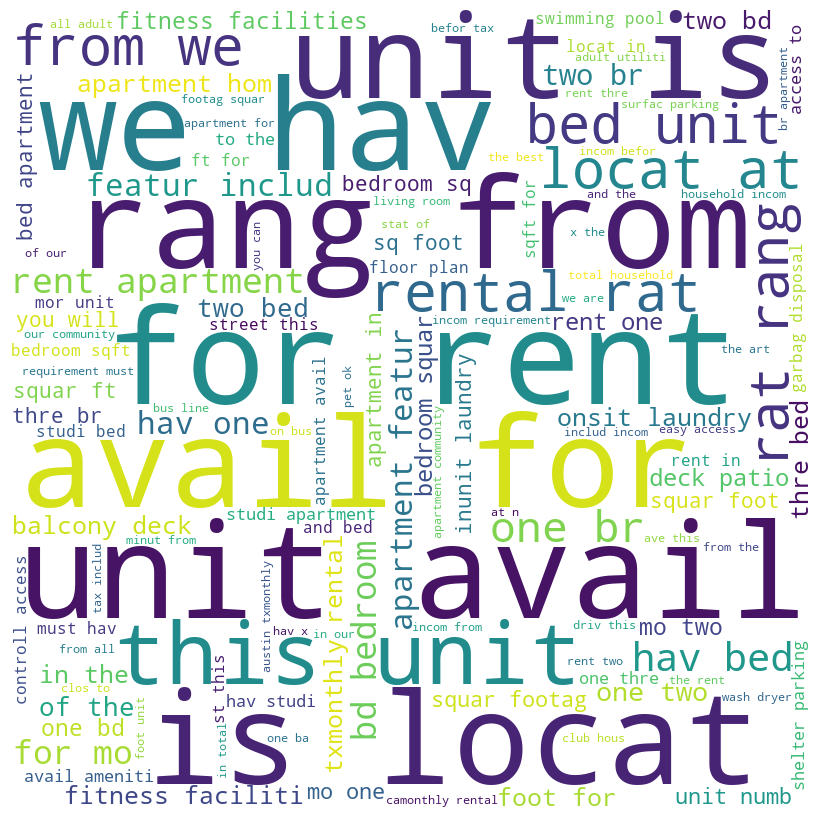

In [163]:
mostrar_grafico(df_procesado['Texto'], stopwords=stop_words)

In [ ]:
# Entrenar modelo Random Forest
model = RandomForestClassifier()
model.fit(X_tf_idf, y_tf_idf)

RandomForestClassifier()

In [ ]:
# Predicciones
y_pred = model.predict(X_tf_idf)

In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_tf_idf, y_pred)
precision = precision_score(y_tf_idf, y_pred)
recall = recall_score(y_tf_idf, y_pred)
f1 = f1_score(y_tf_idf, y_pred)
f2 = fbeta_score(y_tf_idf, y_pred, beta=2)
roc_auc = roc_auc_score(y_tf_idf, y_pred)

print("--- MÉTRICAS DEL MODELO ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].